In [4]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.impute import SimpleImputer
import seaborn as sns


<Figure size 1000x600 with 0 Axes>

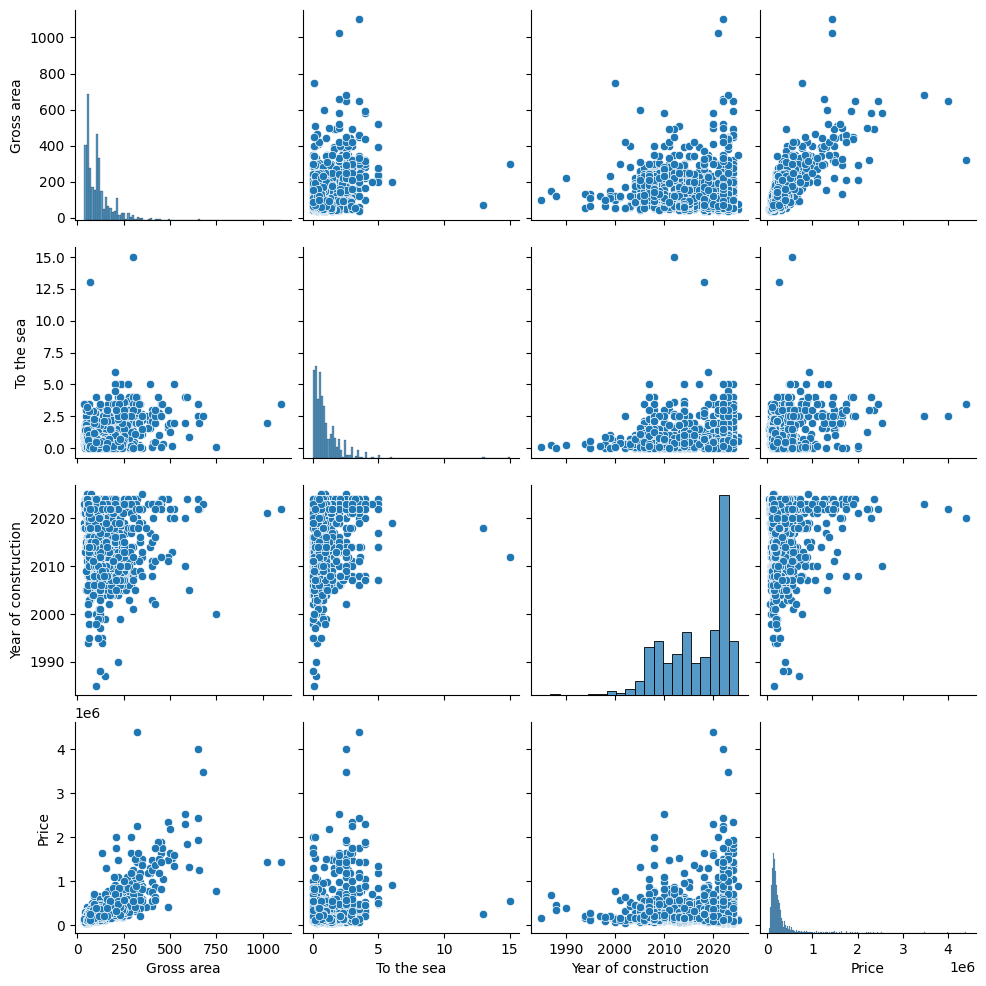

In [6]:

# 1. Load and preprocess data
file_path = 'modified_data.xlsx'  # Path to the Excel file
data = pd.read_excel(file_path)


# Optional: Visualize feature relationships with the target (for exploratory purposes)
features = ['Gross area', 'To the sea',  'Year of construction']
plt.figure(figsize=(10, 6))
sns.pairplot(data, vars=features + ['Price'])
plt.show()


Property Counts by Type:
  Property Type  Count
0    Apartments   1402
1    Commercial      3
2        Duplex     40
3          Land      0
4     Penthouse    313
5        Villas    162


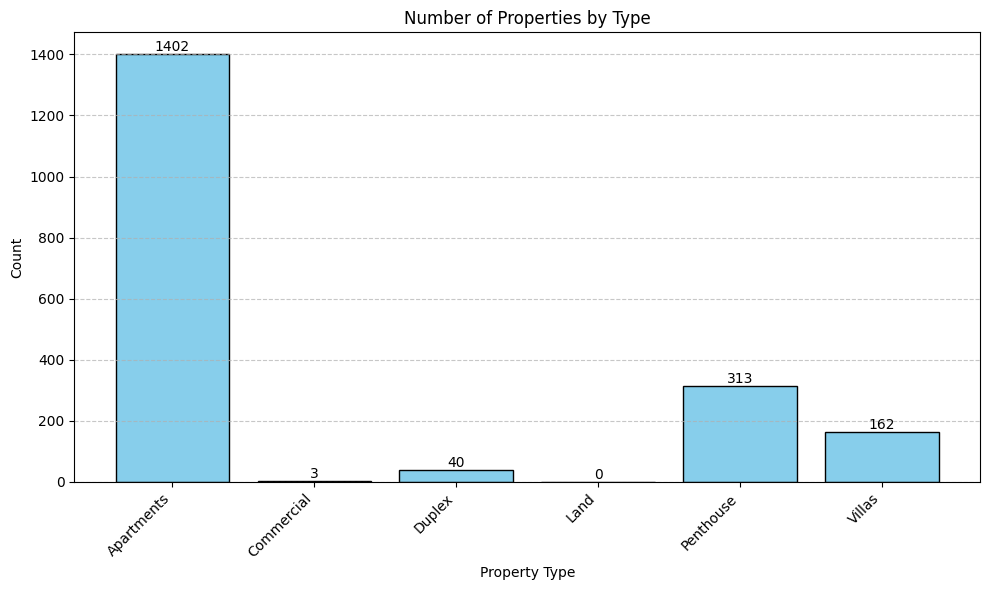

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = 'modified_data.xlsx'  # Replace with the actual file path
data = pd.read_excel(file_path)

# Define property types
property_types = [
    "Property type_Apartments",
    "Property type_Commercial",
    "Property type_Duplex",
    "Property type_Land",
    "Property type_Penthouse",
    "Property type_Villas"
]

# Count the number of properties in each category
property_counts = {}
for prop_type in property_types:
    property_counts[prop_type.replace("Property type_", "")] = data[prop_type].sum()

# Convert counts to DataFrame for visualization and display
counts_df = pd.DataFrame(list(property_counts.items()), columns=["Property Type", "Count"])
print("Property Counts by Type:")
print(counts_df)

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(counts_df["Property Type"], counts_df["Count"], color="skyblue", edgecolor="black")

# Add numerical values above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Configure plot appearance
plt.title("Number of Properties by Type")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

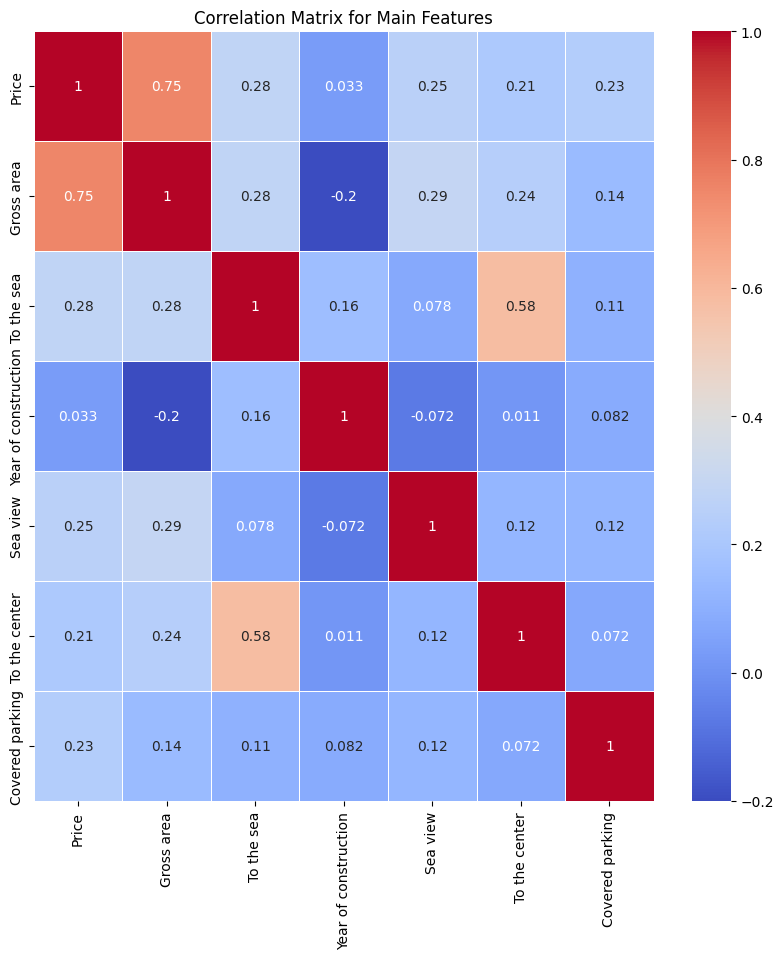

In [8]:
# Выбор основных параметров для корреляционной матрицы
features = ['Price', 'Gross area', 'To the sea', 'Year of construction', 'Sea view',  'To the center', 
            'Covered parking'
]

# Создание корреляционной матрицы
corr_matrix = data[features].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Main Features')
plt.show()